In [1]:
import numpy as np
from netCDF4 import Dataset

In [2]:
f = Dataset('DataAnginModel.nc')
print (f.variables.keys())

dict_keys(['longitude', 'latitude', 'time', 'u10', 'v10'])


In [60]:
time = f.variables['time'][:]
lats = f.variables['latitude'][:]
lons = f.variables['longitude'][:]
u10 = f.variables['u10'][:]
v10 = f.variables['v10'][:]

In [5]:
import pandas as pd

# Menghitung nilai statistik dari 
uv_stat = { 'stat':['mean','max','min'],
            'u10': [u10.mean(), u10.max(), u10.min()], 
            'v10': [v10.mean(), v10.max(), v10.min()]}

df = pd.DataFrame(uv_stat)

df.set_index('stat',inplace=True)
display (df)

,u10,v10
stat,,
mean,2.500756,-0.729232
max,8.046131,6.073419
min,-4.784142,-5.793956


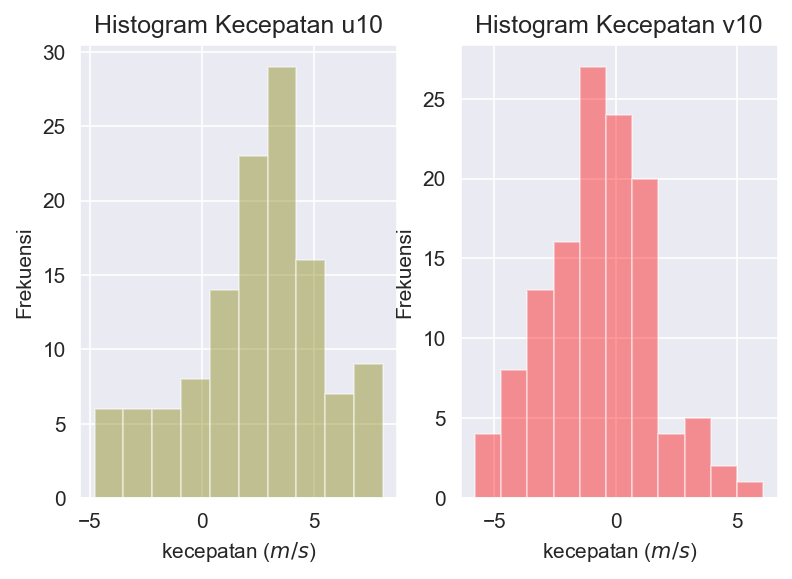

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2,dpi=150)
sns.set_style('darkgrid')

sns.distplot(u10, color='olive', kde=False, label='u10',ax=ax1)
ax1.set_title('Histogram Kecepatan u10')
ax1.set_xlabel('kecepatan ($m/s$)')
ax1.set_ylabel('Frekuensi')

sns.distplot(v10, color='red',kde=False, label='v10',ax=ax2)
ax2.set_title('Histogram Kecepatan v10')
ax2.set_xlabel('kecepatan ($m/s$)')
ax2.set_ylabel('Frekuensi')

plt.show()